In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel("/content/Mall Customers.xlsx")
data.to_csv("Mall Customers.csv",index=False)
data.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


clustering based on income and spending score

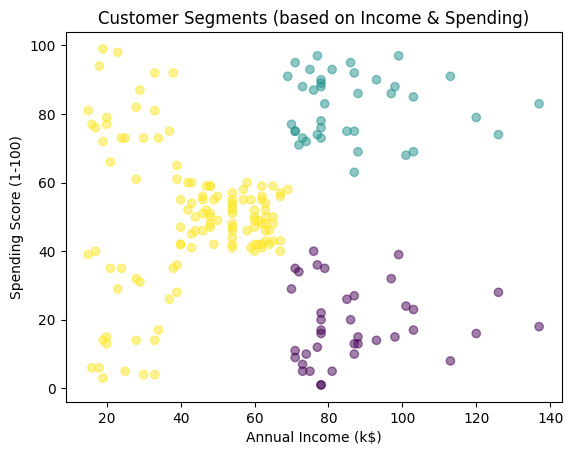

In [26]:
from sklearn.cluster import KMeans

clustered_seg=data[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(clustered_seg)
plt.scatter(data['Annual Income (k$)'], data ['Spending Score (1-100)'],c=data['Cluster'],alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (based on Income & Spending)")
plt.show()

Scaling and visual interpretation

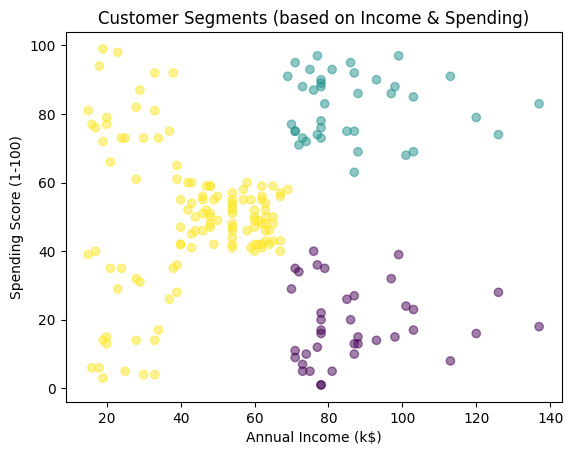

In [27]:
from sklearn.preprocessing import StandardScaler

scaled_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
new_scaled_data = scaler.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Scaled_Cluster'] = kmeans.fit_predict(new_scaled_data)
plt.scatter(data['Annual Income (k$)'], data ['Spending Score (1-100)'],c=data['Scaled_Cluster'],alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (based on Income & Spending)")
plt.show()

In [28]:
data.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster,Scaled_Cluster
0,1,M,19,High School,Married,15,39,2,2
1,2,M,21,Graduate,Single,15,81,2,2
2,3,F,20,Graduate,Married,16,6,2,2
3,4,F,23,High School,Unknown,16,77,2,2
4,5,F,31,Uneducated,Married,17,40,2,2


optimal umber of clusters

number of clusters = 2, silhouette score = 0.3973270007887498
number of clusters = 3, silhouette score = 0.46658474419000145
number of clusters = 4, silhouette score = 0.49434988482196784
number of clusters = 5, silhouette score = 0.5546571631111091
number of clusters = 6, silhouette score = 0.5138257534676561
number of clusters = 7, silhouette score = 0.50200146805547
number of clusters = 8, silhouette score = 0.4550112502601921
number of clusters = 9, silhouette score = 0.4566624374485964
optimal k: 5


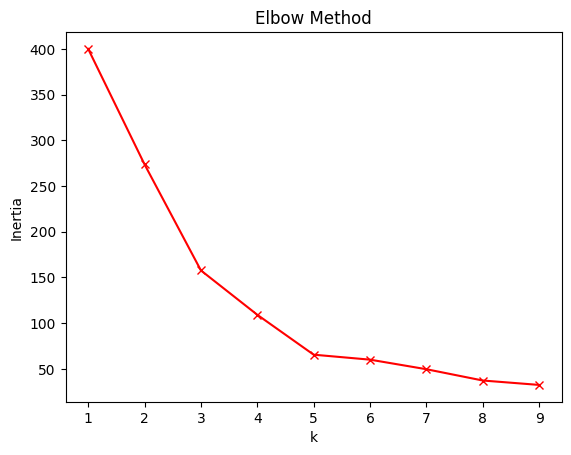

In [23]:
from sklearn.metrics import silhouette_score

inertia=[]
silhouette_score_dict={}
for k in range (1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(new_scaled_data)
    inertia.append(km.inertia_)
    if (k==1):
      continue
    current_score = silhouette_score(new_scaled_data, km.labels_)
    print(f"number of clusters = {k}, silhouette score = {current_score}")
    silhouette_score_dict[k]=current_score

print("optimal k:", max(silhouette_score_dict,key=silhouette_score_dict.get))
plt.plot(range(1,10), inertia, 'rx-')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


the ideal number of clusters should have a lower inertia which shows how compact clusters are and higher silhouette score that is representative of the distance between the clusters. Evident from the graph and silhouette scores, 5 appears to be the optimal number as inertia scores dont vary much as you go along while silhoutte score is the highest

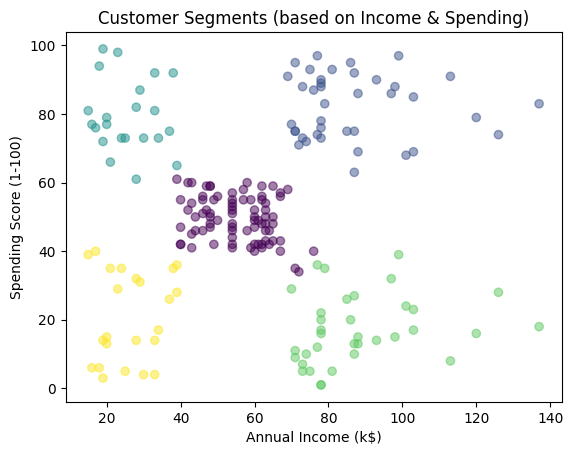

In [44]:
kmeans = KMeans(n_clusters=max(silhouette_score_dict,key=silhouette_score_dict.get), random_state=42, n_init=10)
data['Optimal_Scaled_Cluster'] = kmeans.fit_predict(new_scaled_data)
plt.scatter(data['Annual Income (k$)'], data ['Spending Score (1-100)'],c=data['Optimal_Scaled_Cluster'],alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (based on Income & Spending)")
plt.show()

DBSCAN

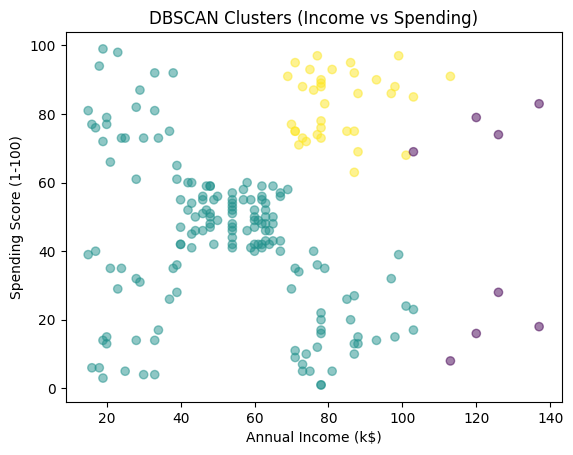

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=4).fit(new_scaled_data)
data['Cluster_DBSCAN'] = dbscan.labels_
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_DBSCAN'],alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clusters (Income vs Spending)")
plt.show()


Hierarchical Clustering

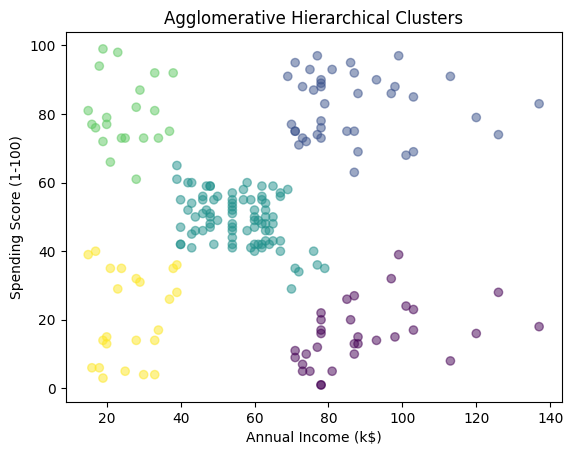

In [40]:
from sklearn.cluster import AgglomerativeClustering

h_cluster=AgglomerativeClustering(n_clusters=5, linkage='ward')
data['Cluster_HC'] = h_cluster.fit_predict(new_scaled_data)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],c=data['Cluster_HC'], alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Hierarchical Clusters")
plt.show()


Average spending per cluster

In [51]:
print("K-Means: Average spending per cluster")
print(data.groupby('Optimal_Scaled_Cluster')['Spending Score (1-100)'].mean())
print("\n")
print("DBSCAN: Average spending per cluster")
print(data.groupby('Cluster_DBSCAN')['Spending Score (1-100)'].mean())
print("\n")
print("\nHierarchical Clustering: Average spending per cluster")
print(data.groupby('Cluster_HC')['Spending Score (1-100)'].mean())


K-Means: Average spending per cluster
Optimal_Scaled_Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


DBSCAN: Average spending per cluster
Cluster_DBSCAN
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64



Hierarchical Clustering: Average spending per cluster
Cluster_HC
0    15.593750
1    82.128205
2    49.129412
3    80.047619
4    20.913043
Name: Spending Score (1-100), dtype: float64
